In [1]:
from context import bowman
from bowman.triangulation import Triangulation
from bowman.point_orbits import *
from bowman.rational_ht_application import *

In [2]:
# define preping functions
def remove_duplicates(veech_gens):
    for x in veech_gens:
        x.set_immutable()
    
    veech_set = set(veech_gens)
    to_return = []
    for x in veech_set:
        y = -x
        y.set_immutable()
        if y not in to_return:
            to_return.append(x)
    return to_return

def mark_points(trin, points_set, rgbcolor=(0, 0, 0)):
    trin_copy = trin
    for tri_id, pt_coords in points_set:
        trin_copy = trin_copy.mark_point(tri_id, pt_coords, rgbcolor)
    return trin_copy

### Testing Code on Prym Eigenforms

Below find tests on the Prym eigenforms.  The forms that have been checked are (9, 2, 0, 1), (16, 2, 0, 1), (9, 1, 0, 0), (10, 1, 0, 0), (19, 2, 0, 1), (11, 1, 0, 0), (11, 1, 0, 1), (12, 1, 0, 1), (12, 1, 0, 0), (13, 1, 0, 0), (13, 1, 0, 1), (13, 1, 0, 2), (14, 1, 0, 0), (14, 1, 0, 1), (14, 1, 0, 2), (15, 1, 0, 0), (15, 1, 0, 2), (15, 1, 0, 3), (16, 1, 0, 0), (16, 1, 0, 1), (16, 1, 0, 2), (16, 1, 0, 3), (17, 1, 0, 0), (17, 1, 0, 1), (17, 1, 0, 2), (17, 1, 0, 3), (17, 1, 0, 4), (17, 2, 0, 0), (18, 1, 0, 1), (18, 1, 0, 2), (18, 1, 0, 3), (18, 1, 0, 4), (19, 1, 0, 0), (19, 1, 0, 1), (19,1, 0, 2), (19, 1, 0, 3), (19, 2, 0, 0), (19, 2, 0, 1).

Cannot do: (18, 2, 1, 0) as not delaunay -> not bicusped.

19 1 0 0
19 1 0 1
19 1 0 2
19 1 0 3
19 1 0 4
19 1 0 5
19 2 0 0
19 2 0 1

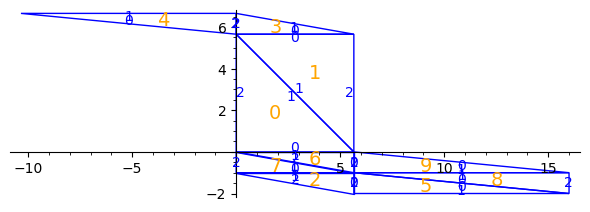

In [20]:
prym = Triangulation.prym_eigenform_type_aplus(16, 1, 0, 0)
#prym = prym.make_delaunay()
prym.plot()
# constraints_dict = segments_for_plotting(bicuspid_segments(prym))
# prym_con = prym.plot_constraints(constraints_dict)
# prym_con.plot().show()

In [4]:
veech_gens = prym.generators_veech.gens
print(len(veech_gens))

1346


In [9]:
veech_elem = veech_gens[30]
veech_elem

[       a + 15  -11/4*a - 38]
[-14/19*a - 12      2*a + 31]

In [ ]:
candidate_points = set()
print("There are ", len(prym.triangles), " triangles in the table.")
for i in range(len(prym.triangles)):
    print("Computing for triangle ", i)
    tri_points = prym.compute_candidate_periodic_points(i, veech_elem)
    for point in tri_points:
        reformatted = (i, point)
        candidate_points.add(reformatted)
print("finished.")

In [ ]:
# this block runs the algorithm on all elements of the veech generators list to reduce to periodic points.
veech_gens = remove_duplicates(veech_gens)
preserved_pts = reduce_periodic_points(prym, candidate_points, veech_gens)
mark_points(prym, preserved_pts).plot().show()
print("The preserved points are ", preserved_pts)

## Testing random

In [54]:
def remove_duplicates(veech_gens):
    for x in veech_gens:
        x.set_immutable()
    
    veech_set = set(veech_gens)
    to_return = []
    for x in veech_set:
        y = -x
        y.set_immutable()
        if y not in to_return:
            to_return.append(x)
    return to_return

def mark_points(trin, points_set, rgbcolor=(0, 0, 0)):
    trin_copy = trin
    for tri_id, pt_coords in points_set:
        trin_copy = trin_copy.mark_point(tri_id, pt_coords, rgbcolor)
    return trin_copy

veech_gens = remove_duplicates(veech_gens)
weierstrass = {(0, (0, 1/2, 1/2)), 
               (2, (0, 1/2, 1/2)), 
               (0, (1/2, 0, 1/2)),
               (1, (1/2, 0, 1/2)),
               (8, (0, 1/2, 1/2)),
               (8, (1/2, 1/2, 0)),
               (4, (0, 1/2, 1/2)),
               (4, (1/2, 1/2, 0)),
              }

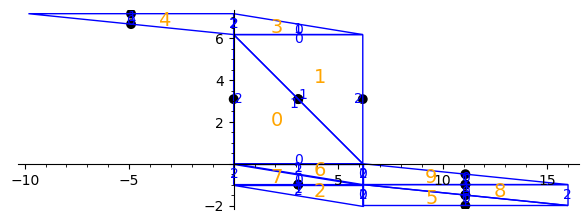

In [55]:
mark_points(prym, weierstrass).plot()

In [ ]:
preserved_pts = reduce_periodic_points(prym, weierstrass, veech_gens, True)

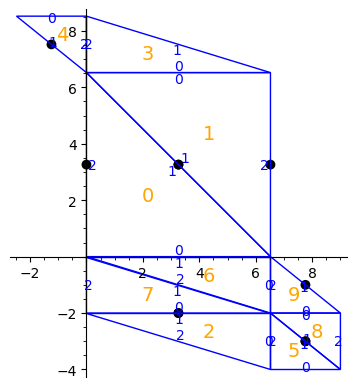

The preserved points are  {(4, (0, 1/2, 1/2)), (0, (0, 1/2, 1/2)), (2, (0, 1/2, 1/2)), (8, (0, 1/2, 1/2)), (0, (1/2, 0, 1/2)), (1, (1/2, 0, 1/2))}


In [35]:
mark_points(prym, preserved_pts).plot().show()
print("The preserved points are ", preserved_pts)

In [57]:
# find the vertical and horizontal sheers
for i, elem in enumerate(veech_gens):
    if(elem[0][1] == 0):
        print(i, elem)

26 [            -1              0]
[1/32*a + 31/32             -1]
28 [             1              0]
[1/32*a + 31/32              1]


In [58]:
vert_sheer = veech_gens[26]
horiz_sheer = veech_gens[13]

In [61]:
len(candidate_points), len(preserved_pts)

(2369, 481)

In [ ]:
preserved_pts = points_preserved(prym, horiz_sheer, candidate_points)
mark_points(prym, preserved_pts).plot().show()
preserved_pts

### Computing constraint lines


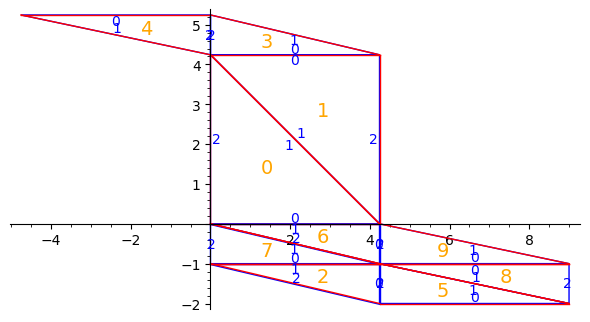

[[0, -1/98*a + 2/49, 0],
 [-1/252*a, -1/28*a + 1/7, 1/28*a - 1/7],
 [0, -1/98*a + 2/49, 1/98*a - 2/49],
 [-1/252*a, -1/28*a + 1/7, 1/14*a - 2/7]]

In [27]:
prym = Triangulation.prym_eigenform_type_aplus(9, 1, 0, 0)
constraints_dict = segments_for_plotting(bicuspid_segments(prym))
prym_con = prym.plot_constraints(constraints_dict)
prym_con.plot().show()
constraints_dict[4]

The form is:  9 1 0 0


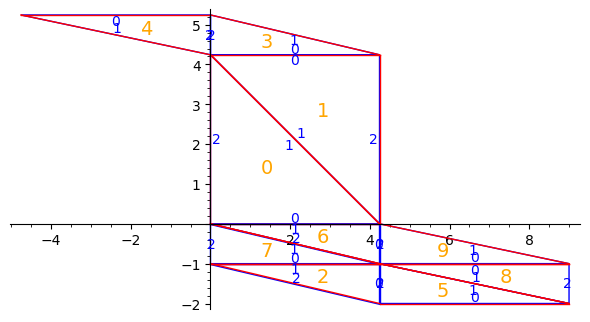

The form is:  10 1 0 0


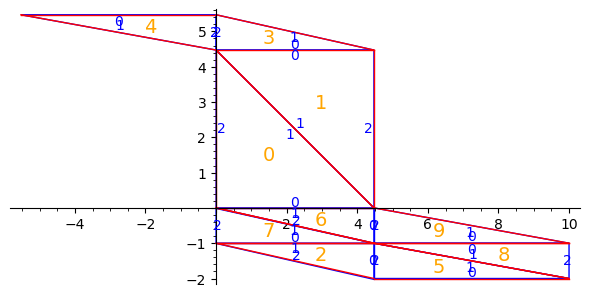

The form is:  11 1 0 0


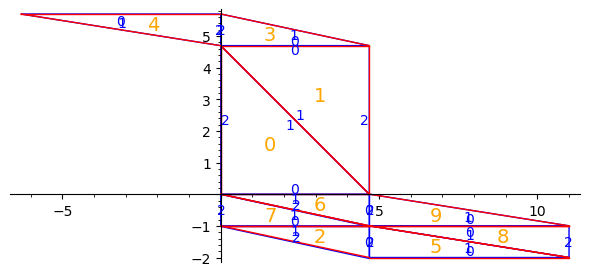

The form is:  11 1 0 1


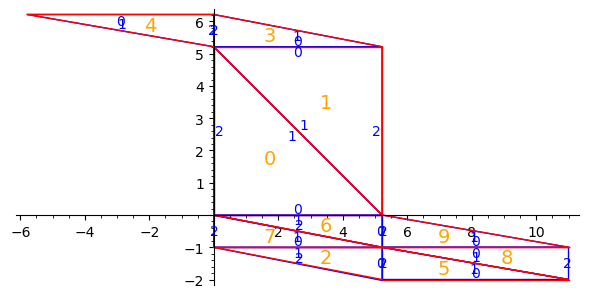

The form is:  12 1 0 0


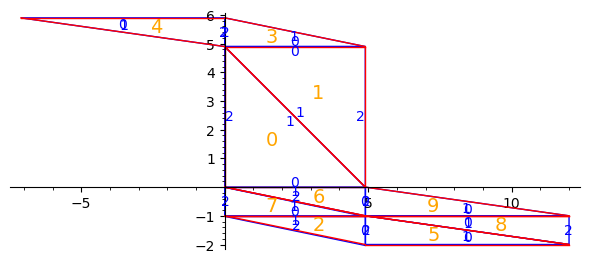

The form is:  12 1 0 1


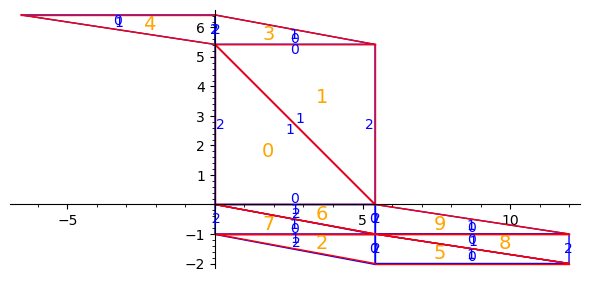

The form is:  13 1 0 0


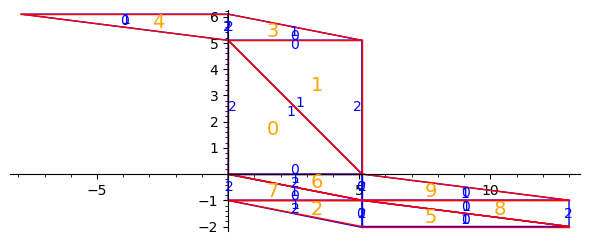

The form is:  13 1 0 1


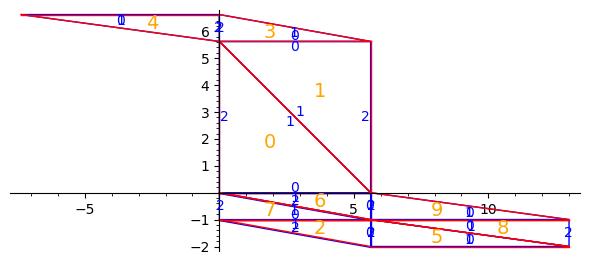

The form is:  13 1 0 2


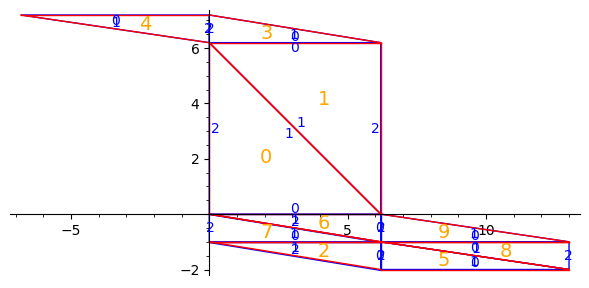

The form is:  14 1 0 0


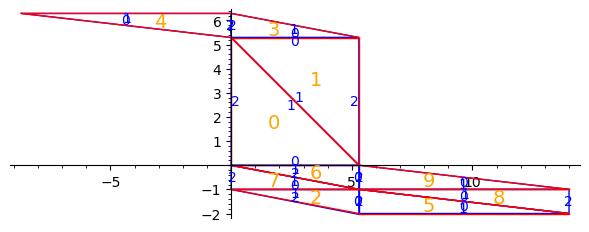

The form is:  14 1 0 1


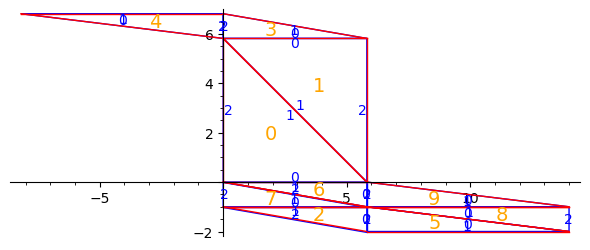

The form is:  14 1 0 2


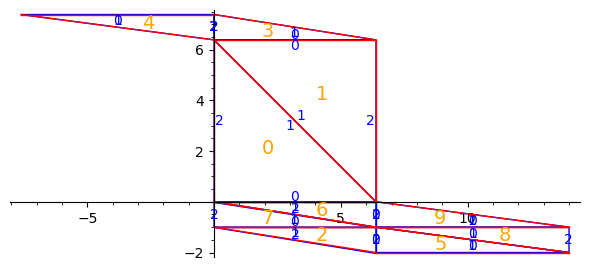

The form is:  15 1 0 0


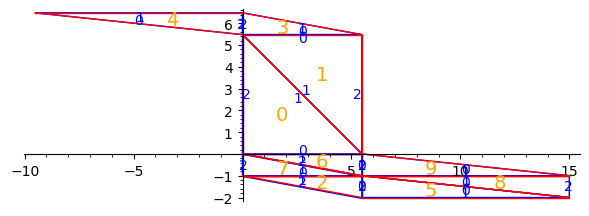

The form is:  15 1 0 2


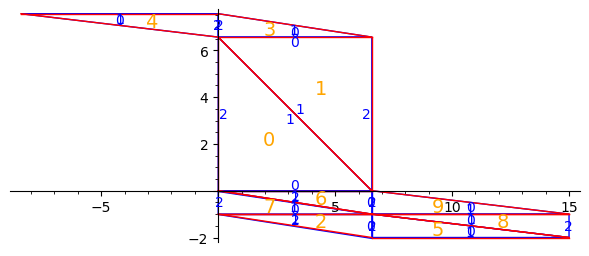

The form is:  15 1 0 3


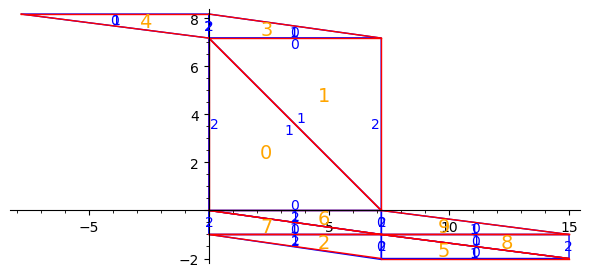

The form is:  16 1 0 0


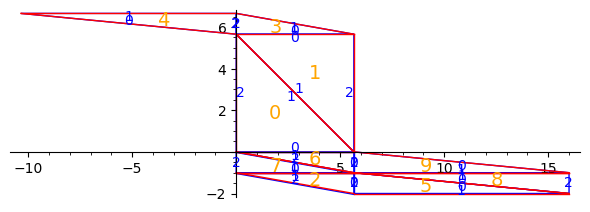

The form is:  16 1 0 1


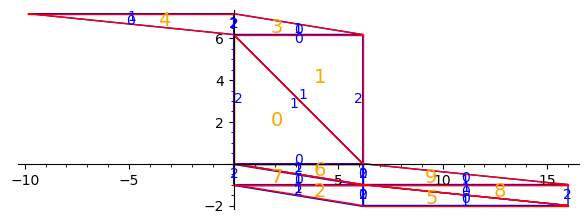

The form is:  16 1 0 2


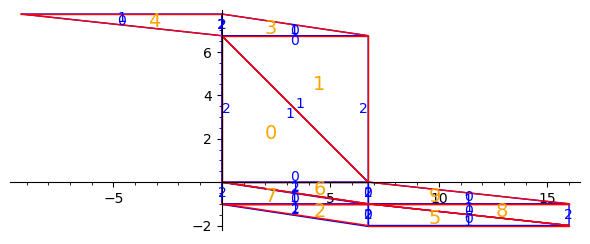

The form is:  16 1 0 3


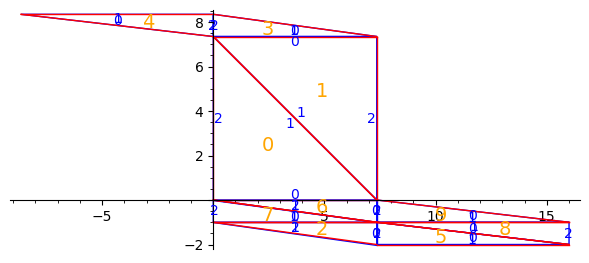

The form is:  17 1 0 0


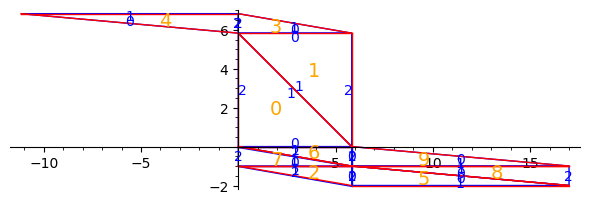

The form is:  17 1 0 1


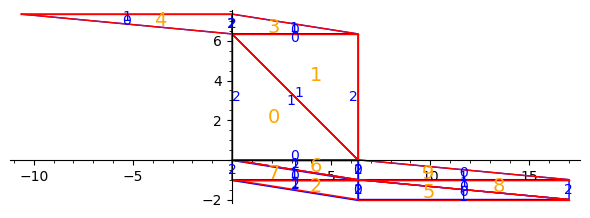

The form is:  17 1 0 2


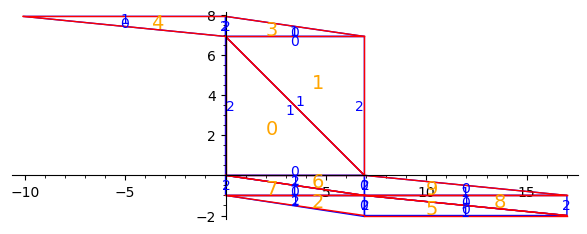

The form is:  17 1 0 3


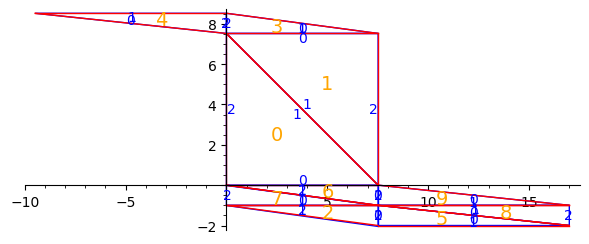

The form is:  17 1 0 4


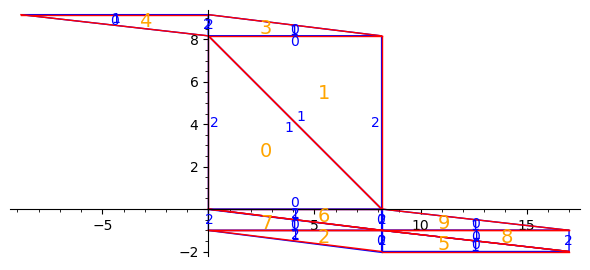

The form is:  17 2 0 0


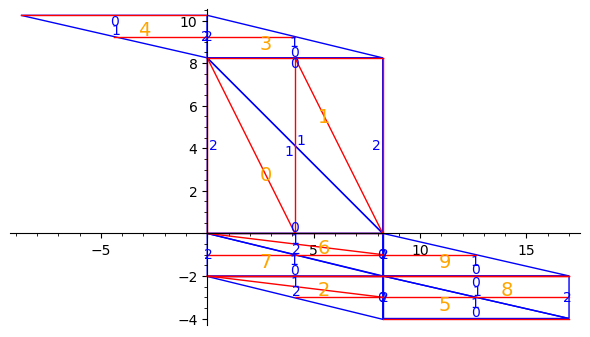

The form is:  18 1 0 1


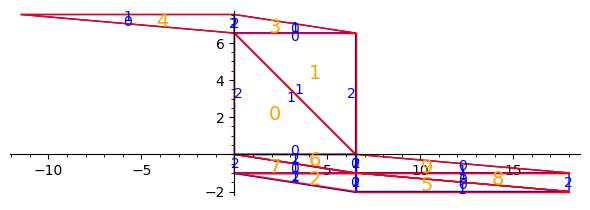

The form is:  18 1 0 2


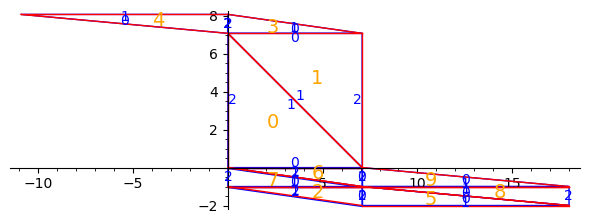

The form is:  18 1 0 3


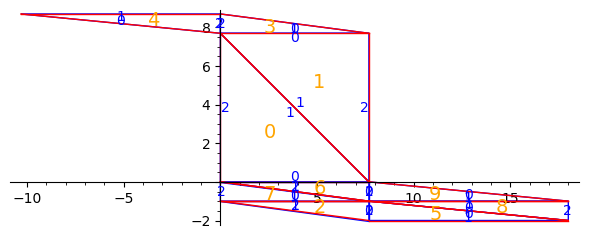

The form is:  18 1 0 4


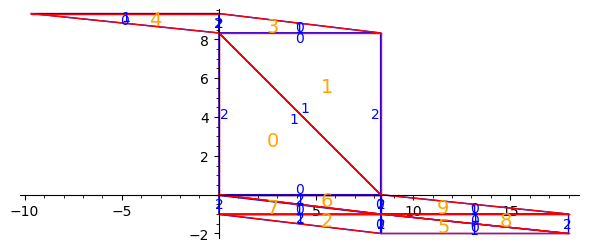

The form is:  19 1 0 0


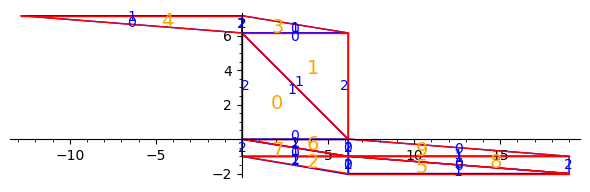

The form is:  19 1 0 1


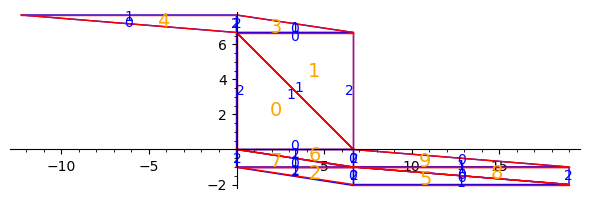

The form is:  19 1 0 2


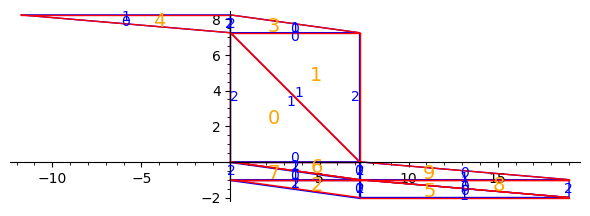

The form is:  19 1 0 3


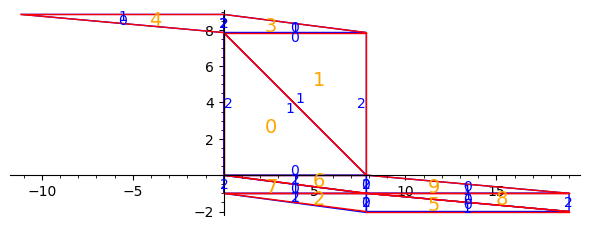

The form is:  19 1 0 4


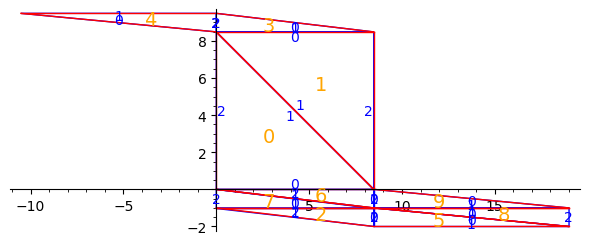

The form is:  19 1 0 5


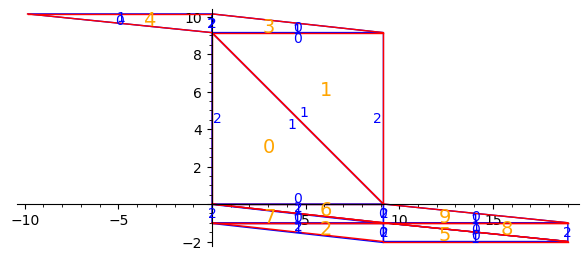

The form is:  19 2 0 0


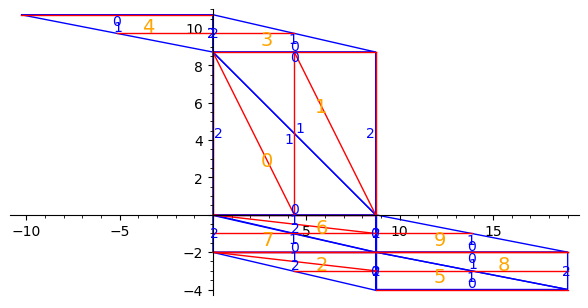

The form is:  19 2 0 1


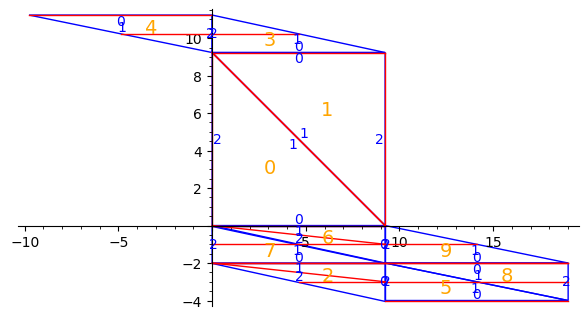

In [19]:
for w, h, t, e in [(w, h, t, e)
                           for (w, h, t, e) in itertools.product(range(20), repeat=4)
                           if (w, h, t, e) != (18, 2, 1, 0)
                           if w > 0
                           if h > 0
                           if t < gcd(w, h)
                           if gcd(gcd(gcd(w, h), t), e) == 1
                           if e + sqrt(e**2 + 8 * w * h) > 0
                           if w > e + sqrt(e**2 + 8 * w * h)
                        if not (e**2 + 8*w * h).is_square()]:
    
    print("The form is: ", w, h, t, e)
    prym = Triangulation.prym_eigenform_type_aplus(w, h, t, e)
    constraints_dict = segments_for_plotting(bicuspid_segments(prym))
    prym_con = prym.plot_constraints(constraints_dict)
    prym_con.plot().show()